# Stock price prediction of Google 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset=pd.read_csv('Google_Stock_Price_Train.csv')
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_data=train_dataset.reset_index()['Open']
training_data

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

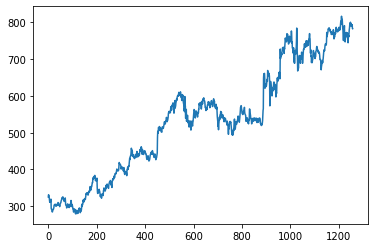

In [4]:
plt.plot(training_data)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range = (0,1))
scaled_training_data=scaler.fit_transform(np.array(training_data).reshape(-1,1))

In [6]:
scaled_training_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
scaled_training_data.shape

(1258, 1)

In [8]:
X_train=[]
y_train=[]
time_step=100
for i in range(0,len(scaled_training_data)-time_step-1):
    X_train.append(scaled_training_data[i:(i+time_step),0])
    y_train.append(scaled_training_data[time_step+i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [9]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.04920381, 0.0382841 ,
        0.04524146],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.0382841 , 0.04524146,
        0.03768882],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.04524146, 0.03768882,
        0.03287075],
       ...,
       [0.91729295, 0.92019495, 0.93548627, ..., 0.96123223, 0.95475854,
        0.95204256],
       [0.92019495, 0.93548627, 0.93381204, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.93548627, 0.93381204, 0.93874172, ..., 0.95204256, 0.95163331,
        0.95725128]])

In [10]:
#reshaping in 3d
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [11]:
#create LSTM stacked model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [12]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [14]:
model.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 21s 278ms/step - loss: 0.0464
Epoch 2/100
37/37 [==============================] - 10s 265ms/step - loss: 0.0074
Epoch 3/100
37/37 [==============================] - 10s 267ms/step - loss: 0.0062
Epoch 4/100
37/37 [==============================] - 10s 273ms/step - loss: 0.0068
Epoch 5/100
37/37 [==============================] - 10s 271ms/step - loss: 0.0050
Epoch 6/100
37/37 [==============================] - 10s 270ms/step - loss: 0.0050
Epoch 7/100
37/37 [==============================] - 10s 268ms/step - loss: 0.0046
Epoch 8/100
37/37 [==============================] - 11s 284ms/step - loss: 0.0049
Epoch 9/100
37/37 [==============================] - 10s 268ms/step - loss: 0.0048
Epoch 10/100
37/37 [==============================] - 12s 327ms/step - loss: 0.0049
Epoch 11/100
37/37 [==============================] - 10s 277ms/step - loss: 0.0050
Epoch 12/100
37/37 [==============================] - 10s 269ms/step - loss: 0.0052
E

37/37 [==============================] - 10s 261ms/step - loss: 0.0015
Epoch 99/100
37/37 [==============================] - 10s 261ms/step - loss: 0.0015
Epoch 100/100
37/37 [==============================] - 10s 262ms/step - loss: 0.0016


In [15]:
# Getting the real stock price of 2017
test_dataset = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_dataset.iloc[:, 1:2].values

In [23]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [26]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train_dataset['Open'], test_dataset['Open']), axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [27]:
dataset_total.shape

(1278,)

In [35]:
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 100:].values
scaled_test_data = scaler.transform(inputs.reshape(-1,1))

In [36]:
scaled_test_data.shape

(120, 1)

In [38]:
X_test = []
for i in range(0,len(scaled_test_data)-time_step-1):
    X_test.append(scaled_test_data[i:(i+time_step), 0])
    
X_test = np.array(X_test)

In [39]:
X_test

array([[0.93874172, 0.94106704, 0.93455614, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.94106704, 0.93455614, 0.93874172, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.93455614, 0.93874172, 0.93232383, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.91176799, 0.91876256, 0.91958107, ..., 0.98245777, 1.01045465,
        1.02407173],
       [0.91876256, 0.91958107, 0.93176576, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.91958107, 0.93176576, 0.92914279, ..., 1.02407173, 1.03930724,
        1.03354044]])

In [40]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [41]:
predicted_stock_price

array([[794.9634 ],
       [792.41815],
       [792.2582 ],
       [793.32855],
       [796.4645 ],
       [802.2643 ],
       [808.17633],
       [811.5123 ],
       [812.7862 ],
       [812.8522 ],
       [812.3483 ],
       [811.5491 ],
       [810.7713 ],
       [810.70917],
       [811.26056],
       [815.23206],
       [821.79736],
       [829.4731 ],
       [834.58704]], dtype=float32)

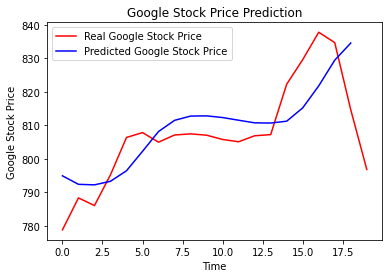

In [42]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()